# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [23]:
# Import your libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [20]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

print(tests)
tests.apply(lambda w: w[1] <0.05)

0     (2.514769534907084, 0.28439681860549465)
1     (4.905148527249263, 0.08607172974001617)
2      (0.746546494238671, 0.6884770827597997)
3    (2.3658366277265714, 0.30638331000471924)
4      (3.287660868418163, 0.1932384357453141)
dtype: object


0    False
1    False
2    False
3    False
4    False
dtype: bool

#### Interpret the normaltest results and make your observations.

In [ ]:
# Explain the test results here
#The first number in the tulip is the z-score and the second one is p-value. 
#In any case, where the p-value is < 0.05, we reject the null hypothesis that the data came from a normal distribution. 
#Wherever we got "True" output, it means that the sample is not normally distributed. 

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

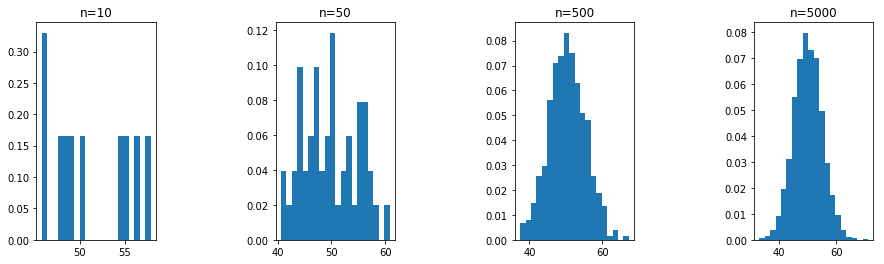

In [24]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Your comment and explanation here
#The larger the sample size, the more normally distributed our data is. 
#The central limit theorem states that the distribution of sample means approximates a normal distribution as the sample size gets larger.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

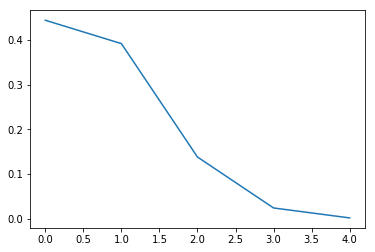

In [114]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [25]:
# Your comment here
#as n increases, the probability PMF decreases. Thus the probability that 4 people out of 5 click on ad is minimal, in comparison to 1 person for example.

#### Now plot PMP with 50, 500, and 5000 visitors.

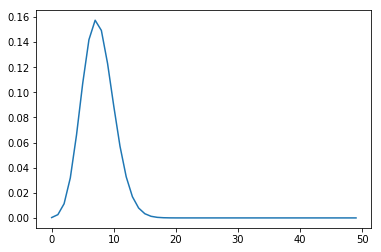

In [29]:
# Your code here
from scipy.stats import binom
n, p = 50, 0.15
x = range(n)
dist = binom(n, p)
fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
plt.show()

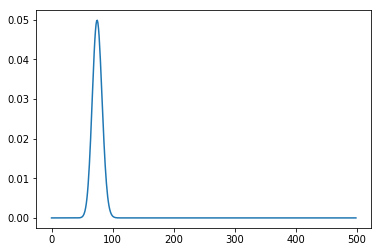

In [30]:
from scipy.stats import binom
n, p = 500, 0.15
x = range(n)
dist = binom(n, p)
fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
plt.show()

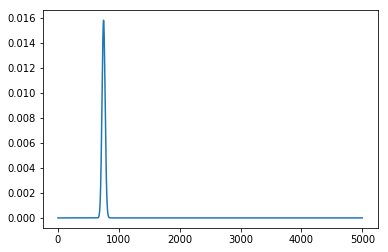

In [31]:
from scipy.stats import binom
n, p = 5000, 0.15
x = range(n)
dist = binom(n, p)
fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here
#sum of all the values must be equal to 1. With increasing n, each individual PMF value became smaller.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here
# It expresses the probability of a given number of events occurring in a fixed interval of time or space if 
# these events occur with a known constant rate and independently of the time since the last event.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [40]:
# Your code here
from scipy.stats import poisson
poisson.pmf(320, 300)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [41]:
# Your code here
poisson.pmf(60, 300)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

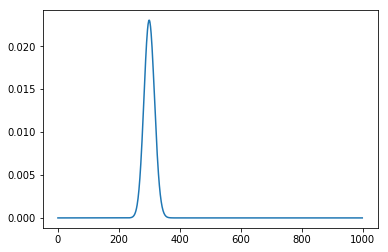

In [42]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)